In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import tensorflow as tf
from tensorflow.python.framework import ops
import math
from datetime import timedelta

In [18]:
dmd_df = pd.read_csv("campusDemand.csv", parse_dates=["Time"])
dmd_df.head()

,Point name,Time,Value,Rendered,Annotation
0,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:00:50,80635.421875,80635 Watts,NaN
1,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:01:50,77046.992188,77047 Watts,NaN
2,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:02:50,76787.828125,76788 Watts,NaN
3,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:03:50,79804.031250,79804 Watts,NaN
4,Porter Hall Electric (Shark 30) - Watts,2014-09-10 00:04:50,79397.078125,79397 Watts,NaN


In [19]:
try:
    dmd_df.drop(["Rendered", "Annotation"], inplace=True, axis=1)
except:
    pass
dmd_df["Time"] = pd.to_datetime(dmd_df["Time"])
dmd_df.head(), dmd_df.dtypes

(                                Point name                Time         Value
 0  Porter Hall Electric (Shark 30) - Watts 2014-09-10 00:00:50  80635.421875
 1  Porter Hall Electric (Shark 30) - Watts 2014-09-10 00:01:50  77046.992188
 2  Porter Hall Electric (Shark 30) - Watts 2014-09-10 00:02:50  76787.828125
 3  Porter Hall Electric (Shark 30) - Watts 2014-09-10 00:03:50  79804.031250
 4  Porter Hall Electric (Shark 30) - Watts 2014-09-10 00:04:50  79397.078125,
 Point name            object
 Time          datetime64[ns]
 Value                float64
 dtype: object)

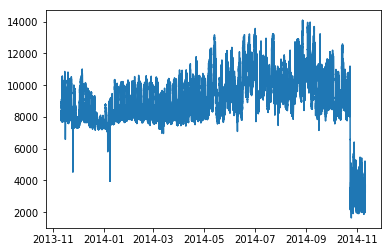

In [20]:
def roundhr(dt_time):
    dt_time = dt_time.replace(microsecond=0, second=0, minute=0)
    return dt_time

try:
    dmd_df.drop(["Rendered", "Annotation"], inplace=True, axis=1)
except:
    pass
dmd_df["Time"] = pd.to_datetime(dmd_df["Time"])
dmd_df.head(), dmd_df.dtypes

dmd_main = dmd_df[dmd_df["Point name"] == dmd_df["Point name"].unique()[5]]
plt.plot(dmd_main["Time"], dmd_main["Value"])


In [21]:
dmd_main["Timex"] = dmd_main["Time"].apply(lambda x: roundhr(x))
dmd_main.head()
dmd_mainx = dmd_main.set_index(["Timex"])
dmd_mainx = dmd_mainx.resample("1H").mean()
dmd_mainx.reset_index(inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
dmd_mainx.head()

,Timex,Value
0,2013-11-10 00:00:00,8261.731944
1,2013-11-10 01:00:00,8131.553229
2,2013-11-10 02:00:00,7985.570644
3,2013-11-10 03:00:00,7912.394148
4,2013-11-10 04:00:00,7857.923992


In [40]:
weatherdf = pd.read_csv("Weather_data_all.csv")
weatherdf = weatherdf.drop("Unnamed: 0", axis = 1)
weatherdf["Time"] = pd.to_datetime(weatherdf["Time"])
weatherdf.head(), weatherdf.dtypes

(                 Time  Temp (F)  Humidity  Wind Speed  Condition
 0 2012-01-01 00:00:00      39.2      0.87         6.9       13.0
 1 2012-01-01 01:00:00      39.2      0.87         3.5       13.0
 2 2012-01-01 02:00:00      37.9      0.86         4.6       16.0
 3 2012-01-01 03:00:00      37.0      0.89         3.5        0.0
 4 2012-01-01 04:00:00      36.0      0.89         5.8        0.0,
 Time          datetime64[ns]
 Temp (F)             float64
 Humidity             float64
 Wind Speed           float64
 Condition            float64
 dtype: object)

In [41]:
dmd_mainx["Time"] = dmd_mainx["Timex"]
df = weatherdf.merge(dmd_mainx)
df.drop(["Timex"], axis=1, inplace=True)
df.head()

In [57]:
# datetime.weekday(df["Time"][0])
df["Weekday"] = df["Time"].apply(lambda x: datetime.weekday(x))
new = np.asarray(df["Weekday"])
check = pd.get_dummies(new)
check.head()

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [58]:
df = df.join(check)
df.head()

,Time,Temp (F),Humidity,Wind Speed,Condition,Value,Weekday,0,1,2,3,4,5,6
0,2013-11-10 00:00:00,54.0,0.35,17.3,13.0,8261.731944,6,0,0,0,0,0,0,1
1,2013-11-10 01:00:00,53.1,0.41,20.7,12.0,8131.553229,6,0,0,0,0,0,0,1
2,2013-11-10 02:00:00,53.1,0.45,17.3,12.0,7985.570644,6,0,0,0,0,0,0,1
3,2013-11-10 03:00:00,51.1,0.48,12.7,14.0,7912.394148,6,0,0,0,0,0,0,1
4,2013-11-10 04:00:00,50.0,0.52,15.0,14.0,7857.923992,6,0,0,0,0,0,0,1


In [59]:
# df["Time"][0].dt.hour
df['hours'] = df.Time.dt.hour
df.head()

,Time,Temp (F),Humidity,Wind Speed,Condition,Value,Weekday,0,1,2,3,4,5,6,hours
0,2013-11-10 00:00:00,54.0,0.35,17.3,13.0,8261.731944,6,0,0,0,0,0,0,1,0
1,2013-11-10 01:00:00,53.1,0.41,20.7,12.0,8131.553229,6,0,0,0,0,0,0,1,1
2,2013-11-10 02:00:00,53.1,0.45,17.3,12.0,7985.570644,6,0,0,0,0,0,0,1,2
3,2013-11-10 03:00:00,51.1,0.48,12.7,14.0,7912.394148,6,0,0,0,0,0,0,1,3
4,2013-11-10 04:00:00,50.0,0.52,15.0,14.0,7857.923992,6,0,0,0,0,0,0,1,4


In [64]:
k = list(range(7))
v = list(map(str, k))
v = ["Weekday "+ a for a in v]
dic = zip(k, v)
dic = dict(dic)
# dic1 = dict(zip(v, k))
# pd.rename(df, {0,1,2,3,4,5,6})
dic
df.reset_index(inplace=True)
df = df.rename(dic, axis=1)

In [54]:
k = list(range(24))
v = list(map(str, k))
v = ["Hour "+ a for a in v]
dic = zip(k, v)
dic = dict(dic)
# pd.rename(df, {0,1,2,3,4,5,6})
df = df.rename(dic, axis='columns')
df.head()

,Time,Temp (F),Humidity,Wind Speed,Condition,Value,Weekday,hours,Weekday 0,Weekday 1,...,Hour 14,Hour 15,Hour 16,Hour 17,Hour 18,Hour 19,Hour 20,Hour 21,Hour 22,Hour 23
0,2013-11-10 00:00:00,54.0,0.35,17.3,13.0,8261.731944,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2013-11-10 01:00:00,53.1,0.41,20.7,12.0,8131.553229,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2013-11-10 02:00:00,53.1,0.45,17.3,12.0,7985.570644,6,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2013-11-10 03:00:00,51.1,0.48,12.7,14.0,7912.394148,6,3,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013-11-10 04:00:00,50.0,0.52,15.0,14.0,7857.923992,6,4,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
# from pandas.tseries.holiday import USFederalHolidayCalendar
# cal = USFederalHolidayCalendar()
# holidays = cal.holidays(start='2014-01-01', end='2014-12-31').to_pydatetime()
# if datetime(2014,1,1) in holidays:
#     print(True)
df.to_csv("df.csv")
df.to_pickle("df.pkl")

In [82]:
df.head()

,level_0,index,Time,Temp (F),Humidity,Wind Speed,Condition,Value,Weekday,Weekday 0,...,T-159,T-160,T-161,T-162,T-163,T-164,T-165,T-166,T-167,T-168
0,0,0,2013-11-10 00:00:00,54.0,0.35,17.3,13.0,8261.731944,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2013-11-10 01:00:00,53.1,0.41,20.7,12.0,8131.553229,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2013-11-10 02:00:00,53.1,0.45,17.3,12.0,7985.570644,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,2013-11-10 03:00:00,51.1,0.48,12.7,14.0,7912.394148,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,2013-11-10 04:00:00,50.0,0.52,15.0,14.0,7857.923992,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
for i in range(1, 169):
    new = [None]*i
    new = new + list(df["Value"])
    a = pd.Series(new.copy()[:len(df)])
    df["T"+str(-i)] = a

    
df.to_csv("final.csv")
df.to_pickle("final.pkl")
len(df)


(8783, 7387)

In [80]:
df1.to_csv("finalwona.csv")
df1.to_pickle("finalwona.pkl")

In [6]:
# df = pd.read_pickle("final.pkl")
# df.head()
df = df.drop(["level_0", "index"], axis=1)
df.head()

,Time,Temp (F),Humidity,Wind Speed,Condition,Value,Weekday,Weekday 0,Weekday 1,Weekday 2,...,T-159,T-160,T-161,T-162,T-163,T-164,T-165,T-166,T-167,T-168
0,2013-11-10 00:00:00,54.0,0.35,17.3,13.0,8261.731944,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-11-10 01:00:00,53.1,0.41,20.7,12.0,8131.553229,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-11-10 02:00:00,53.1,0.45,17.3,12.0,7985.570644,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-11-10 03:00:00,51.1,0.48,12.7,14.0,7912.394148,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-11-10 04:00:00,50.0,0.52,15.0,14.0,7857.923992,6,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.to_csv("finalv2.csv")
df.to_pickle("finalv2.pkl")

In [9]:
# for i in range(1, 169):
#     df["T"+str(-i)] = df["T"+str(-i)].shift(24, axis=1)
    
for i in range(1, 169):
    new = [None]*24
    new = new + list(df["T"+str(-i)])
    a = pd.Series(new.copy()[:len(df)])
    df["T"+str(-i)] = a


In [11]:
df.to_csv("finalv3.csv")
df.to_pickle("finalv3.pkl")

In [9]:
df = pd.read_pickle("finalv3.pkl")

df1 = df.dropna()
df1.isnull().sum()

Time          0
Temp (F)      0
Humidity      0
Wind Speed    0
Condition     0
Value         0
Weekday       0
Weekday 0     0
Weekday 1     0
Weekday 2     0
Weekday 3     0
Weekday 4     0
Weekday 5     0
Weekday 6     0
hours         0
Hour 0        0
Hour 1        0
Hour 2        0
Hour 3        0
Hour 4        0
Hour 5        0
Hour 6        0
Hour 7        0
Hour 8        0
Hour 9        0
Hour 10       0
Hour 11       0
Hour 12       0
Hour 13       0
Hour 14       0
             ..
T-139         0
T-140         0
T-141         0
T-142         0
T-143         0
T-144         0
T-145         0
T-146         0
T-147         0
T-148         0
T-149         0
T-150         0
T-151         0
T-152         0
T-153         0
T-154         0
T-155         0
T-156         0
T-157         0
T-158         0
T-159         0
T-160         0
T-161         0
T-162         0
T-163         0
T-164         0
T-165         0
T-166         0
T-167         0
T-168         0
Length: 207, dtype: int6

In [10]:
# i_l1 =

nn1_l1 = []
for i in range(1, 169):
    tmp = ["T"+str(-i)]
    nn1_l1 = nn1_l1 + tmp.copy()

for i in range(24):
    tmp = ["Hour "+str(i)]
    nn1_l1 = nn1_l1 + tmp.copy()

for i in range(7):
    tmp = ["Weekday "+str(i)]
    nn1_l1 = nn1_l1 + tmp.copy()

nn1_l1 = nn1_l1 + ["Temp (F)"]

nn1_l1 = df1[nn1_l1]

out = df1[["Value"]]

In [13]:
nn1_l1.head()

,T-1,T-2,T-3,T-4,T-5,T-6,T-7,T-8,T-9,T-10,...,Hour 22,Hour 23,Weekday 0,Weekday 1,Weekday 2,Weekday 3,Weekday 4,Weekday 5,Weekday 6,Temp (F)
192,8672.508489,8848.965995,8971.941948,9185.956123,9250.951042,9362.168974,9426.543421,9367.917952,9243.272519,9199.059827,...,0,0,1,0,0,0,0,0,0,60.1
193,8486.431955,8672.508489,8848.965995,8971.941948,9185.956123,9250.951042,9362.168974,9426.543421,9367.917952,9243.272519,...,0,0,1,0,0,0,0,0,0,57.9
194,8345.440925,8486.431955,8672.508489,8848.965995,8971.941948,9185.956123,9250.951042,9362.168974,9426.543421,9367.917952,...,0,0,1,0,0,0,0,0,0,55.0
195,8208.969043,8345.440925,8486.431955,8672.508489,8848.965995,8971.941948,9185.956123,9250.951042,9362.168974,9426.543421,...,0,0,1,0,0,0,0,0,0,52.0
196,8120.245189,8208.969043,8345.440925,8486.431955,8672.508489,8848.965995,8971.941948,9185.956123,9250.951042,9362.168974,...,0,0,1,0,0,0,0,0,0,51.1


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nn1_l1, out, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

In [15]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((5103, 200), (5103, 1), (1458, 200), (1458, 1), (730, 200), (730, 1))

,T-1,T-2,T-3,T-4,T-5,T-6,T-7,T-8,T-9,T-10,...,Hour 22,Hour 23,Weekday 0,Weekday 1,Weekday 2,Weekday 3,Weekday 4,Weekday 5,Weekday 6,Temp (F)
2581,9995.961852,9870.024985,9677.370785,9392.847138,8836.845375,8355.431338,8172.150171,8021.895442,8030.463140,8038.729246,...,0,0,0,1,0,0,0,0,0,25.000000
7674,10734.847479,11108.219067,11260.804071,11230.603863,11117.825350,10974.387629,10878.715004,10210.686738,9669.849888,8994.760527,...,0,0,0,0,0,1,0,0,0,72.000000
477,7823.656204,7823.364003,7868.414285,7883.308724,7747.102878,7640.463876,7607.537034,7622.953513,7587.855651,7534.597433,...,0,0,0,0,0,0,1,0,0,28.000000
5220,8463.546600,8325.847346,8155.010012,8162.239642,8099.253806,8136.630915,8131.579498,8154.591408,8216.339717,8358.519904,...,0,0,0,0,0,0,0,0,1,73.900000
1210,7330.407694,7340.382230,7387.772284,7429.839897,7419.429330,7387.274577,7397.377083,7395.188564,7446.858752,7483.295911,...,0,0,1,0,0,0,0,0,0,27.600000
5205,9386.640258,9667.269817,9994.118750,10516.193217,10705.700329,10935.405175,10976.914958,11354.763462,11387.841633,11302.127275,...,0,0,0,0,0,0,0,1,0,66.900000
8266,8135.889844,7974.013644,7910.364298,7919.224323,7907.679190,7907.198585,7971.466169,8042.235133,8188.058665,8251.690654,...,0,0,1,0,0,0,0,0,0,46.900000
3419,9466.811331,9141.883622,8608.533971,8033.893997,7902.727098,7725.103502,7734.808784,7743.872833,7820.701307,7992.077114,...,0,0,0,1,0,0,0,0,0,52.000000
7843,10717.393975,10986.118454,11289.471758,11392.064883,11279.376308,11085.395800,10919.312592,10793.909425,10637.091600,9903.526183,...,0,0,0,0,0,1,0,0,0,72.000000
6792,10105.576733,10421.132983,10618.028346,10847.907008,11048.392854,11348.689279,11741.686358,12151.845346,12344.776200,12439.471846,...,0,0,0,0,1,0,0,0,0,73.900000


In [16]:
X_train1 = np.asarray(X_train)[:, 0:168]/10000
X_train2 = np.asarray(X_train)[:, 168:200]
X_train2[:, 31] = X_train2[:, 31]/100
X_train1.shape, X_train2.shape


X_test1 = np.asarray(X_test)[:, 0:168]/10000
X_test2 = np.asarray(X_test)[:, 168:200]
X_test2[:, 31] = X_test2[:, 31]/100
X_test1.shape, X_test2.shape


X_val1 = np.asarray(X_val)[:, 0:168]/10000
X_val2 = np.asarray(X_val)[:, 168:200]
X_val2[:, 31] = X_val2[:, 31]/100
X_val1.shape, X_val2.shape

((1458, 168), (1458, 32))

In [17]:
np.savetxt("X_train1.txt", X_train1)
np.savetxt("X_train2.txt", X_train2)
np.savetxt("X_val1.txt", X_val1)
np.savetxt("X_val2.txt", X_val2)
np.savetxt("X_test1.txt", X_test1)
np.savetxt("X_test2.txt", X_test2)
np.savetxt("y_train.txt", y_train)
np.savetxt("y_val.txt", y_val)
np.savetxt("y_test.txt", y_test)

In [18]:
X_train1 = np.loadtxt('X_train1.txt', dtype=float)
X_train2 = np.loadtxt('X_train2.txt', dtype=float)
X_val1 = np.loadtxt('X_val1.txt', dtype=float)
X_val2 = np.loadtxt('X_val2.txt', dtype=float)
X_test1 = np.loadtxt('X_test1.txt', dtype=float)
X_test2 = np.loadtxt('X_test2.txt', dtype=float)
y_train = np.loadtxt("y_train.txt", dtype=float)
y_val = np.loadtxt("y_val.txt", dtype=float)
y_test = np.loadtxt("y_test.txt", dtype=float)


In [28]:
y_val

array([10378.64477917,  9089.30216667,  9100.09067917, ...,
       10079.51585833,  8512.54738125,  8990.38910833])

In [19]:
X_train1.shape, X_train2.shape, X_val1.shape, X_val2.shape, X_test1.shape, X_test2.shape, y_train.shape, y_val.shape, y_test.shape

((5103, 168),
 (5103, 32),
 (1458, 168),
 (1458, 32),
 (730, 168),
 (730, 32),
 (5103,),
 (1458,),
 (730,))